# Ian Rabago - PHYS 404 - HW 5

<h3> To iterate through the differential equations, the 4th order Runge-Kutta integrator from class is used: </h3>

In [ ]:
import numpy as np

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

<h3> The differential equation we are trying to solve is that of the Legendre polynomials, </h3>
<h3> $\frac{d^2P_n}{dx^2} = \frac{1}{1-x^2}[2x\frac{dP_n}{dx} - n(n+1)P_n]$ </h3>
<h3> $y'' = \frac{1}{1-x^2}[2xy' - n(n+1)y]$ </h3>

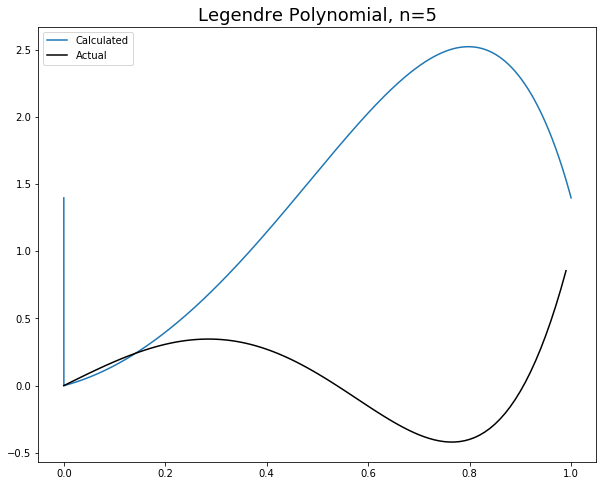

In [45]:
import numpy as np
import matplotlib.pyplot as plt

n = 5       #Legendre polynomial number
h = 1.0e-4  #Step size
ymin, ymax = 0, 1   #Minimum and maximum guesses for y'
yp = 0.5    #Initial guess for y'
xarr, yarr = [], []    #Arrays for plotting the curve.

y = [0, yp, 10]    #Array containing y, y', and y''.

#The actual Legendre polynomial, n=5.
def P_5(x):
    return (63*x**5 - 70*x**3 + 15*x)/8

#Derivative relation for the Legendre Polynomials.
def f(x, y):
    P = np.zeros(3)
    P[0] = y[1]
    P[1] = y[2]
    P[2] = 1/(1-x**2)*(2*x*yp-n*(n+1)*y[0])
    return P

#4th order Runge-Kutta integrator.
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y



iterations = 100
for i in range(iterations):
    #Initialize plotting arrays
    xarr = [0]
    yarr = [y[0]]

    #Integrate from x=0 to x=1 with the current initial conditions. Record the steps in xarr and yarr.
    x = 0
    yp = (ymin+ymax)/2
    y = [0, yp, 10]    #Array containing y, y', and y''.
    for i in range(10000):
        y = rk4(x, h, y, 3)
        #print(y)
        x+= h

        xarr.append(x)
        yarr.append(y[0])
        
    if(y[0] < 1):
        ymax = yp
    else:
        ymin = yp

#Plot results
fig = plt.figure(figsize=(10, 8))
plt.plot(xarr, yarr, label="Calculated")
plt.plot( [0.01*i for i in range(100)], [ P_5(0.01*i) for i in range(100)], 'k-', label="Actual")
plt.title("Legendre Polynomial, n=5", fontsize=18)
plt.legend()
#print(yarr)
plt.show()